# Exploratory Data Analysis: Power Generation and Weather Dynamics

## Introduction

This notebook undertakes an in-depth Exploratory Data Analysis (EDA) of a dataset encompassing power generation and weather information. The primary aim is to reveal underlying patterns, dependencies, and potential anomalies within the data, fostering a nuanced understanding of the intricate relationship between power output and environmental variables. The insights derived from this analysis will serve as a crucial foundation for subsequent machine learning tasks.

## Import dependencies

In [63]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.expand_frame_repr', True)

## Data loading

### Load the historical power generation data into a dataframe
- To facilitate our analysis, we load the crucial historical power generation data into a Pandas dataframe.
- This dataset encompasses essential information about the historical generation of a solar generator.

In [64]:
GEN_DATA_PATH = os.path.join('..', 'data', 'gen_data.csv')
df_gen = pd.read_csv(GEN_DATA_PATH, sep= ";", thousands=r'.', decimal=r',')

### Explore the raw data 

In [80]:
display(df_gen.describe())
display(df_gen.tail())

,DC Gen. Power,Device Temp.,Voltage
count,27193.000000,27193.000000,27193.000000
mean,9413.812816,16.623247,127.358271
std,14090.468994,16.441938,116.682290
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,264.203333,18.583333,230.245000
75%,16619.090000,31.510000,234.645000
max,53146.467500,56.837500,248.067500


,DC Gen. Power,Device Temp.,Voltage
Date/Time (America/Montevideo),,,
2022-11-06 20:00:00,83.325,32.76,234.905
2022-11-06 21:00:00,0.000,0.00,0.000
2022-11-06 22:00:00,0.000,0.00,0.000
2022-11-06 23:00:00,0.000,0.00,0.000
2022-11-07 00:00:00,0.000,0.00,0.000


#### After loading the historical power generation data, let's explore the raw data to gain insights.

**Summary Statistics**
- The dataset comprises 56,386 entries, recorded in 15-minutes intervals.
- The average device temperature is approximately 30.91°C.
- The average generated power is around 17,674W.

**Observations**
- Device temperature has quite a high variance, ranging from -0.68°C to 57.15°C.
- Some entries have NaN values, particularly in the initial timestamp entries, we need to take care of these.
- Generated power distribution spans a wide range, indicating diverse operational conditions.



### Load the Historical Weather Data into a Dataframe
- Importing crucial historical weather data into a Pandas dataframe for analysis.
- This dataset holds information about various meteorological factors, providing a foundation for uncovering their potential impact on power generation.

In [66]:
WEATHER_DATA_PATH = os.path.join('..', 'data', 'weather_data.csv')
df_weather = pd.read_csv(WEATHER_DATA_PATH, sep= ";", thousands=r'.', decimal=r',')

### Explore the raw data 

In [67]:
display(df_weather.describe())
display(df_weather.head())

,Temperature,Precipitation Total,Relative Humidity,Wind Speed,Wind Direction,Cloud Cover Total,Cloud Cover High,Cloud Cover Medium,Cloud Cover Low,CAPE,Sunshine Duration,Shortwave Radiation,Longwave Radiation,UV Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Mean Sea Level Pressure
count,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000
mean,16.735889,0.089496,76.203426,15.281677,156.653944,34.102465,27.648089,16.814578,22.645791,61.831760,19.461736,198.528824,333.203261,22.698979,141.615366,56.913459,1016.423267
std,5.867633,0.512839,14.889832,6.925006,105.817909,34.487450,39.058595,29.072944,33.272372,206.457719,23.713025,283.273064,42.858642,32.747761,232.416439,80.265232,6.178150
min,1.000000,0.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.000000,0.000000,0.000000,0.000000,995.000000
25%,12.000000,0.000000,66.000000,10.000000,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,1012.000000
50%,17.000000,0.000000,79.000000,15.000000,138.000000,26.000000,0.000000,0.000000,2.000000,0.000000,1.000000,9.000000,334.000000,1.000000,1.000000,6.000000,1016.000000
75%,21.000000,0.000000,88.000000,19.000000,239.000000,60.000000,62.000000,22.000000,38.000000,13.000000,42.000000,361.000000,367.000000,40.000000,214.000000,95.000000,1021.000000
max,39.000000,11.000000,100.000000,51.000000,360.000000,100.000000,100.000000,100.000000,100.000000,2602.000000,60.000000,1110.000000,451.000000,128.000000,1008.000000,481.000000,1037.000000


,timestamp,Temperature,Precipitation Total,Relative Humidity,Wind Speed,Wind Direction,Cloud Cover Total,Cloud Cover High,Cloud Cover Medium,Cloud Cover Low,CAPE,Sunshine Duration,Shortwave Radiation,Longwave Radiation,UV Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Mean Sea Level Pressure
0,01/09/19 00:00,7.0,0.0,93.0,7.0,21.0,48.0,0.0,31.0,48.0,35.0,0.0,0.0,265.0,0.0,0.0,0.0,1020.0
1,01/09/19 01:00,8.0,0.0,94.0,10.0,6.0,68.0,7.0,68.0,60.0,39.0,0.0,0.0,272.0,0.0,0.0,0.0,1020.0
2,01/09/19 02:00,7.0,0.0,96.0,13.0,355.0,69.0,4.0,69.0,62.0,35.0,0.0,0.0,293.0,0.0,0.0,0.0,1020.0
3,01/09/19 03:00,7.0,0.0,96.0,14.0,347.0,60.0,0.0,60.0,48.0,27.0,0.0,0.0,316.0,0.0,0.0,0.0,1019.0
4,01/09/19 04:00,7.0,0.0,97.0,16.0,342.0,47.0,0.0,47.0,3.0,16.0,0.0,0.0,313.0,0.0,0.0,0.0,1019.0


#### After loading the historical weather data, let's explore the raw data to gain insights.
**Summary Statistics**

- The dataset consists of 36,549 entries, capturing various meteorological parameters.
- The average temperature recorded is approximately 16.74°C.
- The average wind speed is around 15.28 m/s, with relative humidity averaging at 76.20%.

**Observations**

- Temperature exhibits variability, ranging from 1.00°C to 39.00°C.
- Some columns, such as 'Precipitation Total,' have a considerable number of zero entries, suggesting further investigation may be needed.
- The dataset contains valuable information about cloud cover, wind direction, and other weather-related factors, laying the groundwork for a comprehensive analysis.

## Data processing

### Generator data pre-processing

#### Reindex by timestamps
Reindexing the dataframe by timestamps ensures a consistent time series representation.

In [68]:
df_gen.set_index('Date/Time (America/Montevideo)', inplace=True)
df_gen.index = pd.to_datetime(df_gen.index)

#### Drop irrelevant columns
The selection of relevant columns (`DC Gen. Power`, `Device Temp.`, `Voltage`) focuses on key parameters for our analysis.

In [69]:
TARGET_COLUMN = 'DC Gen. Power'
df_gen = df_gen[[TARGET_COLUMN, 'Device Temp.', 'Voltage']]

#### Resample to 1 Hr. intervals to match weather data periodicity
Resampling the data to 1-hour intervals aligns the generator data with the periodicity of the weather data, facilitating meaningful comparisons and correlations between the two datasets.

In [70]:
df_gen = df_gen.resample('1H', label='right', closed='right' ).mean().fillna(0)

#### Explore the resulting dataframe

In [71]:
display(df_gen.describe())
display(df_gen.tail())

,DC Gen. Power,Device Temp.,Voltage
count,27193.000000,27193.000000,27193.000000
mean,9413.812816,16.623247,127.358271
std,14090.468994,16.441938,116.682290
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,264.203333,18.583333,230.245000
75%,16619.090000,31.510000,234.645000
max,53146.467500,56.837500,248.067500


,DC Gen. Power,Device Temp.,Voltage
Date/Time (America/Montevideo),,,
2022-11-06 20:00:00,83.325,32.76,234.905
2022-11-06 21:00:00,0.000,0.00,0.000
2022-11-06 22:00:00,0.000,0.00,0.000
2022-11-06 23:00:00,0.000,0.00,0.000
2022-11-07 00:00:00,0.000,0.00,0.000


#### The resulting dataframe reflects the impact of reindexing, resampling, and column selection.
- Resampling to 1-hour intervals condenses the data for synchronized analysis with the weather dataframe.
- Focus on relevant columns ('DC Gen. Power', 'Device Temp.', 'Voltage') aligns with targeted variables.

### Weather data pre-processing

#### Reindex by timestamps

In [72]:
df_weather = df_weather.set_index('timestamp').dropna()
df_weather.index = pd.to_datetime(df_weather.index, format='%d/%m/%y %H:%M')

#### Explore the resulting dataframe

In [73]:
display(df_weather.describe())
display(df_weather.head())

,Temperature,Precipitation Total,Relative Humidity,Wind Speed,Wind Direction,Cloud Cover Total,Cloud Cover High,Cloud Cover Medium,Cloud Cover Low,CAPE,Sunshine Duration,Shortwave Radiation,Longwave Radiation,UV Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Mean Sea Level Pressure
count,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000,36549.000000
mean,16.735889,0.089496,76.203426,15.281677,156.653944,34.102465,27.648089,16.814578,22.645791,61.831760,19.461736,198.528824,333.203261,22.698979,141.615366,56.913459,1016.423267
std,5.867633,0.512839,14.889832,6.925006,105.817909,34.487450,39.058595,29.072944,33.272372,206.457719,23.713025,283.273064,42.858642,32.747761,232.416439,80.265232,6.178150
min,1.000000,0.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.000000,0.000000,0.000000,0.000000,995.000000
25%,12.000000,0.000000,66.000000,10.000000,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,1012.000000
50%,17.000000,0.000000,79.000000,15.000000,138.000000,26.000000,0.000000,0.000000,2.000000,0.000000,1.000000,9.000000,334.000000,1.000000,1.000000,6.000000,1016.000000
75%,21.000000,0.000000,88.000000,19.000000,239.000000,60.000000,62.000000,22.000000,38.000000,13.000000,42.000000,361.000000,367.000000,40.000000,214.000000,95.000000,1021.000000
max,39.000000,11.000000,100.000000,51.000000,360.000000,100.000000,100.000000,100.000000,100.000000,2602.000000,60.000000,1110.000000,451.000000,128.000000,1008.000000,481.000000,1037.000000


,Temperature,Precipitation Total,Relative Humidity,Wind Speed,Wind Direction,Cloud Cover Total,Cloud Cover High,Cloud Cover Medium,Cloud Cover Low,CAPE,Sunshine Duration,Shortwave Radiation,Longwave Radiation,UV Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Mean Sea Level Pressure
timestamp,,,,,,,,,,,,,,,,,
2019-09-01 00:00:00,7.0,0.0,93.0,7.0,21.0,48.0,0.0,31.0,48.0,35.0,0.0,0.0,265.0,0.0,0.0,0.0,1020.0
2019-09-01 01:00:00,8.0,0.0,94.0,10.0,6.0,68.0,7.0,68.0,60.0,39.0,0.0,0.0,272.0,0.0,0.0,0.0,1020.0
2019-09-01 02:00:00,7.0,0.0,96.0,13.0,355.0,69.0,4.0,69.0,62.0,35.0,0.0,0.0,293.0,0.0,0.0,0.0,1020.0
2019-09-01 03:00:00,7.0,0.0,96.0,14.0,347.0,60.0,0.0,60.0,48.0,27.0,0.0,0.0,316.0,0.0,0.0,0.0,1019.0
2019-09-01 04:00:00,7.0,0.0,97.0,16.0,342.0,47.0,0.0,47.0,3.0,16.0,0.0,0.0,313.0,0.0,0.0,0.0,1019.0


### Merge datasets by date into a single dataframe

In [74]:
df = df_weather.merge(df_gen, left_index=True, right_index=True, how='inner').dropna()

## Data exploration

### Observe the resulting dataframe

In [75]:
display(df.describe())
display(df.head(5))

,Temperature,Precipitation Total,Relative Humidity,Wind Speed,Wind Direction,Cloud Cover Total,Cloud Cover High,Cloud Cover Medium,Cloud Cover Low,CAPE,Sunshine Duration,Shortwave Radiation,Longwave Radiation,UV Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Mean Sea Level Pressure,DC Gen. Power,Device Temp.,Voltage
count,27193.000000,27193.00000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000
mean,16.627478,0.09359,76.571875,15.296363,158.174126,34.120068,26.698636,16.685323,23.041297,56.962821,19.429375,198.756003,332.122936,22.717133,141.571544,57.184459,1016.569411,9413.812816,16.623247,127.358271
std,5.747354,0.52444,14.631257,7.075218,105.934545,34.721862,38.838634,29.056124,33.485937,197.739820,23.739488,283.641779,42.884811,32.771661,232.646396,81.032914,6.173145,14090.468994,16.441938,116.682290
min,1.000000,0.00000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,0.000000,0.000000,0.000000,995.000000,0.000000,0.000000,0.000000
25%,12.000000,0.00000,67.000000,10.000000,66.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,299.000000,0.000000,0.000000,0.000000,1012.000000,0.000000,0.000000,0.000000
50%,17.000000,0.00000,79.000000,14.000000,140.000000,26.000000,0.000000,0.000000,2.000000,0.000000,1.000000,10.000000,333.000000,1.000000,1.000000,6.000000,1017.000000,264.203333,18.583333,230.245000
75%,21.000000,0.00000,89.000000,19.000000,242.000000,60.000000,57.000000,22.000000,39.000000,12.000000,42.000000,361.000000,365.000000,40.000000,213.000000,94.000000,1021.000000,16619.090000,31.510000,234.645000
max,39.000000,11.00000,100.000000,51.000000,360.000000,100.000000,100.000000,100.000000,100.000000,2533.000000,60.000000,1110.000000,451.000000,128.000000,1008.000000,481.000000,1037.000000,53146.467500,56.837500,248.067500


,Temperature,Precipitation Total,Relative Humidity,Wind Speed,Wind Direction,Cloud Cover Total,Cloud Cover High,Cloud Cover Medium,Cloud Cover Low,CAPE,Sunshine Duration,Shortwave Radiation,Longwave Radiation,UV Radiation,Direct Shortwave Radiation,Diffuse Shortwave Radiation,Mean Sea Level Pressure,DC Gen. Power,Device Temp.,Voltage
2019-10-01 00:00:00,16.0,2.0,97.0,8.0,137.0,23.0,77.0,22.0,14.0,1310.0,0.0,0.0,401.0,0.0,0.0,0.0,1003.0,0.0,0.0,0.0
2019-10-01 01:00:00,16.0,1.0,99.0,11.0,169.0,34.0,40.0,34.0,22.0,776.0,0.0,0.0,389.0,0.0,0.0,0.0,1003.0,0.0,0.0,0.0
2019-10-01 02:00:00,15.0,2.0,99.0,17.0,166.0,48.0,69.0,38.0,48.0,817.0,0.0,0.0,371.0,0.0,0.0,0.0,1003.0,0.0,0.0,0.0
2019-10-01 03:00:00,15.0,3.0,99.0,18.0,153.0,100.0,98.0,100.0,78.0,1017.0,0.0,0.0,378.0,0.0,0.0,0.0,1002.0,0.0,0.0,0.0
2019-10-01 04:00:00,15.0,3.0,99.0,17.0,143.0,100.0,100.0,100.0,100.0,791.0,0.0,0.0,391.0,0.0,0.0,0.0,1002.0,0.0,0.0,0.0


#### The merged dataframe consists of 27,193 entries, integrating weather and generator data.
- Key meteorological parameters such as temperature, precipitation, and wind speed are now paired with generator-specific metrics.
- Descriptive statistics provide an overview of the combined dataset, highlighting the variability and distribution of each variable.
- Initial entries showcase the synchronized information, setting the stage for detailed analysis and modeling.

### Correlation

In this section, we delve into the correlation between power generation and various environmental factors. Utilizing visualizations and statistical measures, we aim to uncover relationships and dependencies that contribute to a nuanced understanding of how external conditions impact power output. 

These insights will serve as a foundation for informed decision-making in subsequent data-driven tasks.

#### Generation vs Shortwave radiation plot

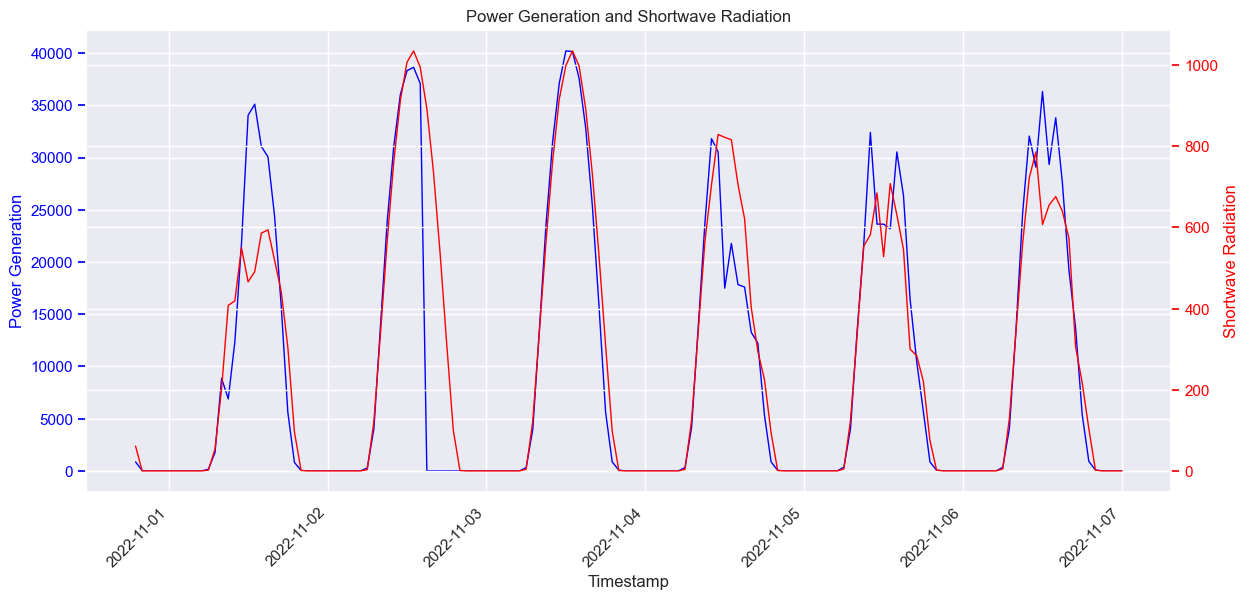

In [76]:
sns.set_style("darkgrid")
fig, ax1 = plt.subplots(figsize=(14, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Power Generation and Shortwave Radiation')

# Plot power generation on the first axis
ax1.plot(df.index[-150:], df[TARGET_COLUMN].iloc[-150:], linewidth=1, color='blue', label='Power Generation')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Power Generation', color='blue')
ax1.tick_params('y', colors='blue')

# Plot shortwave radiation on the second axis
ax2 = ax1.twinx()
ax2.plot(df.index[-150:], df['Shortwave Radiation'].iloc[-150:], linewidth=1, color='red', label='Shortwave Radiation')
ax2.set_ylabel('Shortwave Radiation', color='red')
ax2.tick_params('y', colors='red')

plt.show()


The plot highlights the dynamic interplay between power generation and shortwave radiation, shedding light on the pivotal role of solar radiation in the generator's performance. Shortwave radiation, encompassing the sun's direct and diffuse rays, holds particular significance as it directly influences the photovoltaic cells' ability to convert sunlight into electrical power. This plot allows us to discern patterns and dependencies, offering valuable insights into how variations in shortwave radiation impact the efficiency of the solar generator. The selection of shortwave radiation as a focus stems from its direct correlation with the primary energy source driving the power generation process – solar irradiance.

#### Generation vs Longwave radiation plot

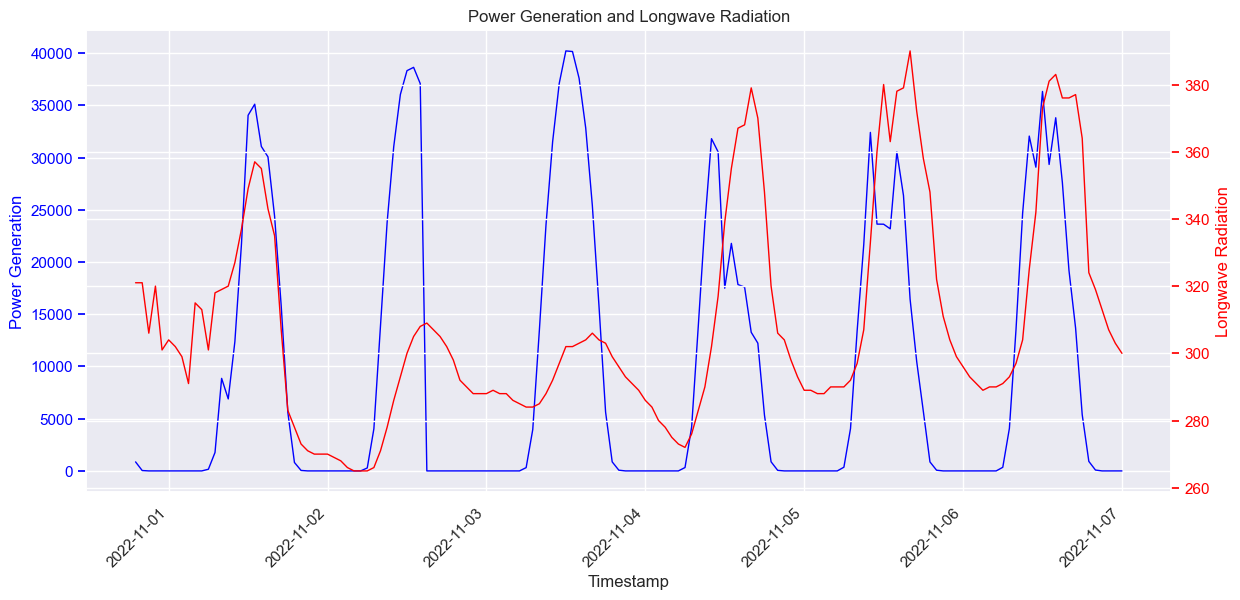

In [77]:
sns.set_style("darkgrid")
fig, ax1 = plt.subplots(figsize=(14, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Power Generation and Longwave Radiation')

# Plot power generation on the first axis
ax1.plot(df.index[-150:], df[TARGET_COLUMN].iloc[-150:], linewidth=1, color='blue', label='Power Generation')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Power Generation', color='blue')
ax1.tick_params('y', colors='blue')

# Plot shortwave radiation on the second axis
ax2 = ax1.twinx()
ax2.plot(df.index[-150:], df['Longwave Radiation'].iloc[-150:], linewidth=1, color='red', label='Longwave Radiation')
ax2.set_ylabel('Longwave Radiation', color='red')
ax2.tick_params('y', colors='red')

plt.show()


Similar to the examination of shortwave radiation, this plot explores the intricate relationship between power generation and longwave radiation. Longwave radiation represents the thermal energy emitted by the Earth's surface and the atmosphere, contributing to the overall energy balance. Unlike shortwave radiation, which primarily originates from the sun, longwave radiation is a measure of the Earth's outgoing infrared radiation.

Understanding the impact of longwave radiation on power generation is crucial, as it reflects the thermal conditions influencing the generator's performance. By scrutinizing this relationship, we gain valuable insights into how the atmospheric heat exchange affects the efficiency of the solar generator, providing a comprehensive view of the diverse factors influencing its power output.

#### Correlation Matrix

The correlation matrix heatmap visually represents the relationships between variables in our dataset. Each cell's color indicates the strength and direction of the correlation: warmer colors for positive, cooler colors for negative, and neutral tones for no significant correlation.

This visual exploration helps identify potential dependencies between environmental factors and power generation, providing insights into the intricate dynamics within the dataset.

<Axes: >

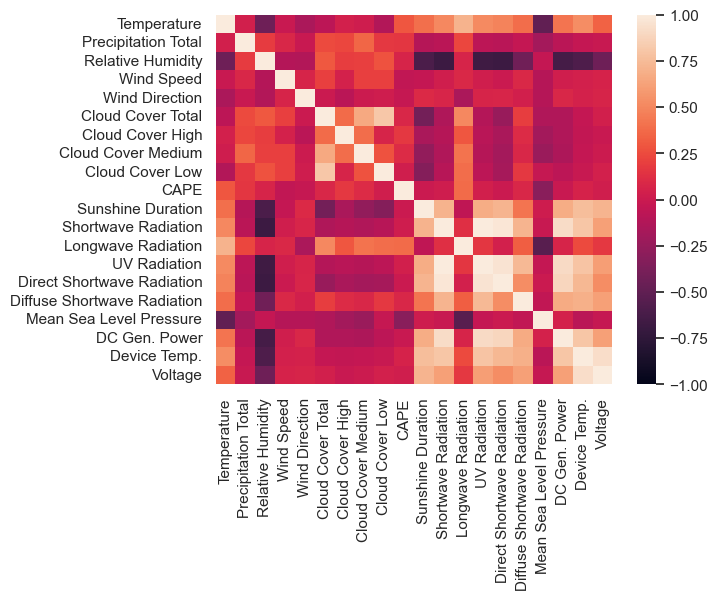

In [78]:
sns.heatmap(df.corr(), cmap='rocket', vmin=-1, vmax=1)

#### Observe correlation between Generated Power and rest of the variables

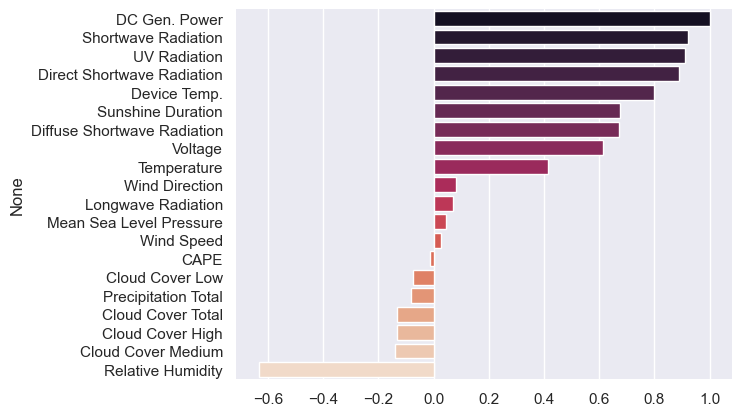

In [79]:
corr = df.corrwith(df[TARGET_COLUMN]).sort_values(ascending=False)
sns.set(style="darkgrid")
sns.barplot(x=corr.values, palette = 'rocket', hue=corr.index,  y=corr.index)
sns.despine(left=True, bottom=True)

#### Correlation observations
Analyzing the correlation between Power Generation and other variables reveals significant associations. 

- As expected, Power Generation is highly positively correlated with Shortwave Radiation (0.92), UV Radiation (0.91), and Direct Shortwave Radiation (0.89).
- Device Temperature (0.80) and Sunshine Duration (0.67) also exhibit notable positive correlations.
Weak Positive Correlations:
- Relative humidity is negatively correlated with Power Generation (-0.63).
- Wind Speed, Sea Level Pressure, Longwave Radiation do not seem to have a significant correlation with power generation (|corr| < 0.1).

These correlations provide valuable insights into the factors influencing Power Generation, guiding further analysis and potential optimizations in solar energy harvesting.